In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns

!pip install wordcloud matplotlib
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
!pip install svgling
nltk.download('vader_lexicon')

plt.style.use('ggplot')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/smridwanulhaque/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
df = pd.read_csv('Food_Reviews')
df.head(10)

,Unnamed: 0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


<Axes: title={'center': 'Ratings Distribution By Stars'}>

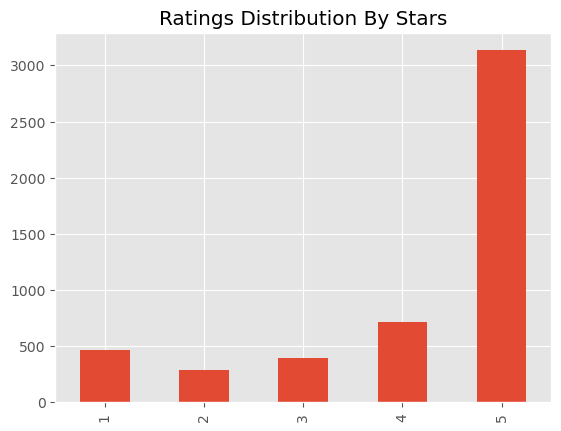

In [3]:
df['Score'].value_counts().sort_index().plot(kind = "bar", title = "Ratings Distribution By Stars")

In [4]:
ex = df['Text'].values[50]
tokens = nltk.word_tokenize(ex)
tokens

['This',
 'oatmeal',
 'is',
 'not',
 'good',
 '.',
 'Its',
 'mushy',
 ',',
 'soft',
 ',',
 'I',
 'do',
 "n't",
 'like',
 'it',
 '.',
 'Quaker',
 'Oats',
 'is',
 'the',
 'way',
 'to',
 'go',
 '.']

#Using VADER

In [5]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [6]:
#testing
sia.polarity_scores('This food is really bad')

{'neg': 0.487, 'neu': 0.513, 'pos': 0.0, 'compound': -0.5849}

In [7]:
res = {} #dictionary to store 
for i, row in tqdm(df.iterrows(), total = len(df)):
    text = row['Text']
    myId = row['Id']
    res[myId] = sia.polarity_scores(text)

    

  0%|          | 0/5000 [00:00<?, ?it/s]

In [8]:
pd.DataFrame(res)

,1,2,3,4,5,6,7,8,9,10,...,4991,4992,4993,4994,4995,4996,4997,4998,4999,5000
neg,0.0000,0.1380,0.0910,0.0,0.0000,0.029,0.0340,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.1150,0.0000,0.080,0.0250,0.0260,0.0970,0.1540,0.0000
neu,0.6950,0.8620,0.7540,1.0,0.5520,0.809,0.6930,0.5200,0.8510,0.7050,...,0.5650,0.8180,0.8480,0.6790,0.692,0.8830,0.7640,0.8270,0.6370,0.7170
pos,0.3050,0.0000,0.1550,0.0,0.4480,0.163,0.2730,0.4800,0.1490,0.2950,...,0.4350,0.1820,0.0370,0.3210,0.228,0.0920,0.2100,0.0760,0.2090,0.2830
compound,0.9441,-0.5664,0.8265,0.0,0.9468,0.883,0.9346,0.9487,0.6369,0.8313,...,0.9531,0.7177,-0.8264,0.9693,0.792,0.7193,0.9846,-0.0554,0.9078,0.9923


In [9]:
vaders = pd.DataFrame(res).T

vaders

,neg,neu,pos,compound
1,0.000,0.695,0.305,0.9441
2,0.138,0.862,0.000,-0.5664
3,0.091,0.754,0.155,0.8265
4,0.000,1.000,0.000,0.0000
5,0.000,0.552,0.448,0.9468
...,...,...,...,...
4996,0.025,0.883,0.092,0.7193
4997,0.026,0.764,0.210,0.9846
4998,0.097,0.827,0.076,-0.0554
4999,0.154,0.637,0.209,0.9078


In [10]:
vaders = vaders.reset_index().rename(columns={'index' : 'Id'})
vaders

,Id,neg,neu,pos,compound
0,1,0.000,0.695,0.305,0.9441
1,2,0.138,0.862,0.000,-0.5664
2,3,0.091,0.754,0.155,0.8265
3,4,0.000,1.000,0.000,0.0000
4,5,0.000,0.552,0.448,0.9468
...,...,...,...,...,...
4995,4996,0.025,0.883,0.092,0.7193
4996,4997,0.026,0.764,0.210,0.9846
4997,4998,0.097,0.827,0.076,-0.0554
4998,4999,0.154,0.637,0.209,0.9078


In [11]:
vaders = vaders.merge(df,how="left")
vaders

,Id,neg,neu,pos,compound,Unnamed: 0,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,3,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,0.025,0.883,0.092,0.7193,4995,B00653KJ5M,AGE64SY3HP9RV,CZ,1,1,2,1341273600,The cavemen must have been wealthy,I really wanted to like these.<br /><br />Firs...
4996,4997,0.026,0.764,0.210,0.9846,4996,B00653KJ5M,A1MPEPNJ2NKWM,Rachel Albert Matesz,1,1,1,1341100800,These cookies need work; you can make your own...,I was not impressed with these cookies when I ...
4997,4998,0.097,0.827,0.076,-0.0554,4997,B00653KJ5M,A1T6I625FGQS20,IL,1,1,3,1336694400,Okay in a pinch - not great,The cookies came sealed and seem to be high qu...
4998,4999,0.154,0.637,0.209,0.9078,4998,B00653KJ5M,A3POAWC2JPQQQP,me,0,0,4,1342137600,"they are good (except for the ""rainforest"" fla...","These taste very good, but aren't like the BES..."


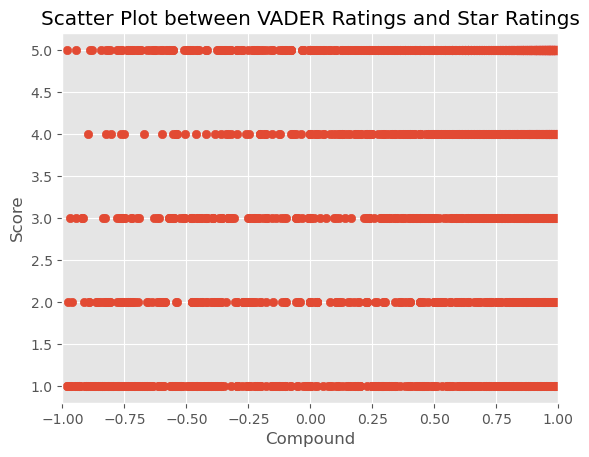

In [34]:
#vaders = vaders.dropna(subset=['compound', 'Score'])
plt.scatter(vaders['compound'], vaders['Score'])
plt.xlim(-1, 1)
plt.title('Scatter Plot between VADER Ratings and Star Ratings')
plt.xlabel('Compound')
plt.ylabel('Score')
plt.show()

In [13]:
liked_products = vaders
liked_products['Score'] = liked_products['Score'].astype(int)
liked_products = liked_products.sort_values(by="Score", ascending=False)
liked_products = liked_products.head(1000)

In [14]:
def modify_string(s):
    s = re.sub(r'[^a-zA-Z\s]', '', s)  # Keep only alphabetic characters and spaces
    s = re.sub(r'\bbr\b', '', s, flags=re.IGNORECASE)  # Remove "br" as a whole word (case-insensitive)
    s = re.sub(r'\bAmazon\b', '', s, flags=re.IGNORECASE)  # Remove "Amazon" as a whole word (case-insensitive)
    s = re.sub(r'\bproduct\b', '', s, flags=re.IGNORECASE)  # Remove "Product" as a whole word (case-insensitive)
    s = ' '.join(s.split()) + ' '  # Add a space to each element at the end
    return s
liked_products['modifiedText'] = liked_products['Text'].apply(modify_string)

In [15]:
liked_products['modifiedText'].to_csv('likedFile.txt', index=False, header=False)

In [16]:
# Read the modified text file into a DataFrame
liked_words = pd.read_csv('likedFile.txt', names=['modified_text'])

# Concatenate all the words into a single string
all_text = ' '.join(liked_words['modified_text'].values)

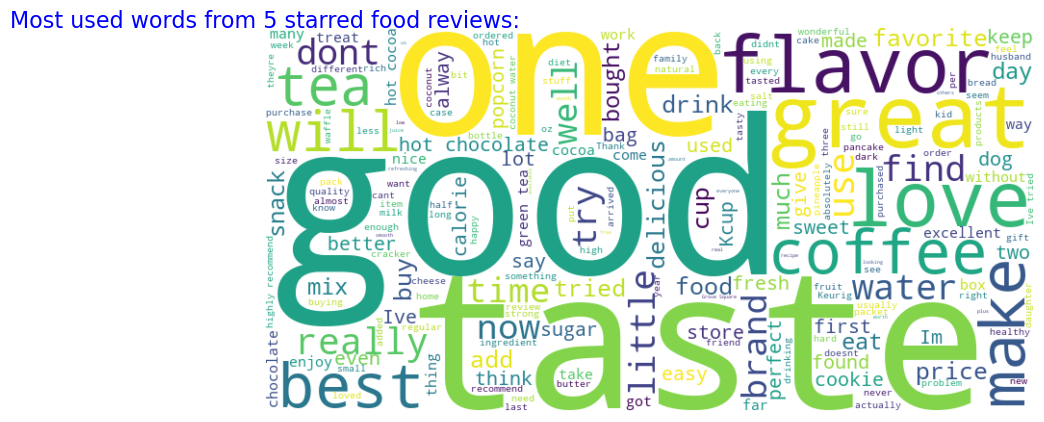

In [17]:
# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.text(0,0,'Most used words from 5 starred food reviews:',horizontalalignment='center',fontsize=16, color='blue')
plt.show()

In [18]:
disliked_products = vaders
disliked_products['Score'] = disliked_products['Score'].astype(int)
disliked_products = disliked_products.sort_values(by='Score', ascending=True)
disliked_products = disliked_products.head(500)

In [19]:
def modify_string(s):
    s = re.sub(r'[^a-zA-Z\s]', '', s)  # Keep only alphabetic characters and spaces
    s = re.sub(r'\bbr\b', '', s, flags=re.IGNORECASE)  # Remove "br" as a whole word (case-insensitive)
    s = re.sub(r'\bAmazon\b', '', s, flags=re.IGNORECASE)  # Remove "Amazon" as a whole word (case-insensitive)
    s = re.sub(r'\bproduct\b', '', s, flags=re.IGNORECASE)  # Remove "Product" as a whole word (case-insensitive)
    s = ' '.join(s.split()) + ' '  # Add a space to each element at the end
    return s
disliked_products['modifiedText'] = disliked_products['Text'].apply(modify_string)

In [20]:
disliked_products['modifiedText'].to_csv('dislikedFile.txt', index=False, header=False)

In [21]:
# Read the modified text file into a DataFrame
disliked_words = pd.read_csv('dislikedFile.txt', names=['modified_text'])

# Concatenate all the words into a single string
all_text = ' '.join(disliked_words['modified_text'].values)

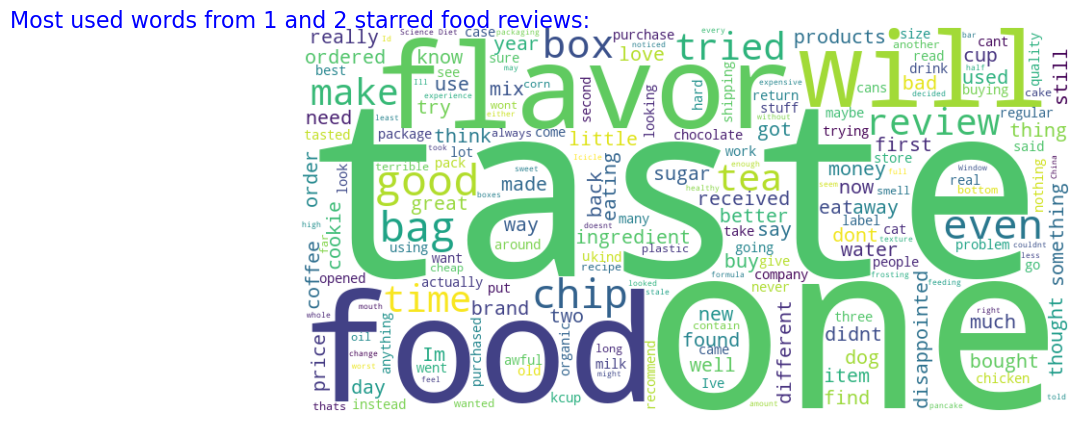

In [22]:
# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.text(0,0,'Most used words from 1 and 2 starred food reviews:',horizontalalignment='center',fontsize=16, color='blue')
plt.show()

In [23]:
positive_sentiment_products = vaders
positive_sentiment_products['compound'] = positive_sentiment_products['compound']
positive_sentiment_products = positive_sentiment_products.sort_values(by='compound', ascending=False)
positive_sentiment_products = positive_sentiment_products.head(1000)

In [24]:
def modify_string(s):
    s = re.sub(r'[^a-zA-Z\s]', '', s)  # Keep only alphabetic characters and spaces
    s = re.sub(r'\bbr\b', '', s, flags=re.IGNORECASE)  # Remove "br" as a whole word (case-insensitive)
    s = re.sub(r'\bAmazon\b', '', s, flags=re.IGNORECASE)  # Remove "Amazon" as a whole word (case-insensitive)
    s = re.sub(r'\bproduct\b', '', s, flags=re.IGNORECASE)  # Remove "Product" as a whole word (case-insensitive)
    s = ' '.join(s.split()) + ' '  # Add a space to each element at the end
    return s
positive_sentiment_products['modifiedText'] = positive_sentiment_products['Text'].apply(modify_string)

In [25]:
positive_sentiment_products['modifiedText'].to_csv('positive_sentimentFile.txt', index=False, header=False)

In [26]:
# Read the modified text file into a DataFrame
positive_sentiment_words = pd.read_csv('positive_sentimentFile.txt', names=['modified_text'])

# Concatenate all the words into a single string
all_text = ' '.join(positive_sentiment_words['modified_text'].values)

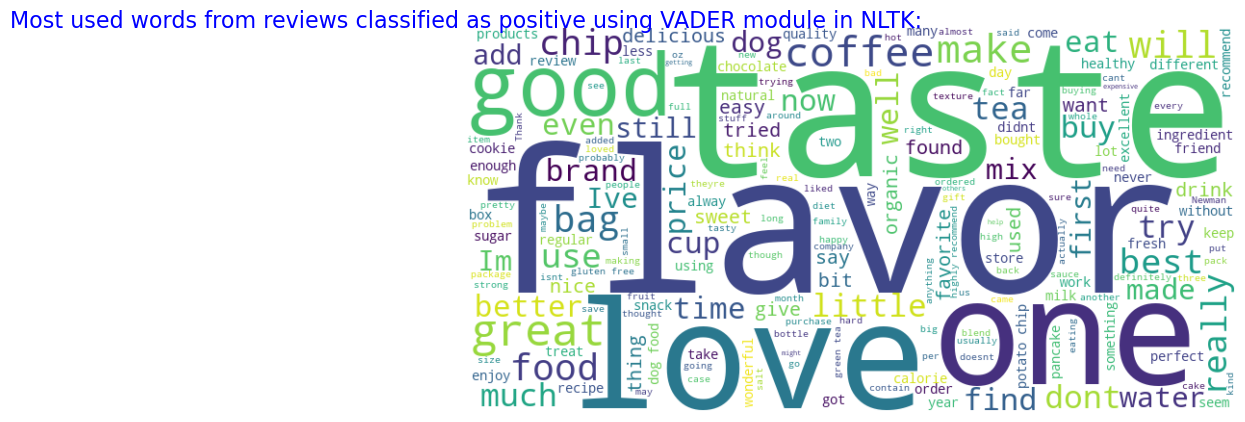

In [27]:
# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.text(0,0,'Most used words from reviews classified as positive using VADER module in NLTK:',horizontalalignment='center',fontsize=16, color='blue')
plt.show()

In [28]:
negative_sentiment_products = vaders
negative_sentiment_products['compound'] = negative_sentiment_products['compound']
negative_sentiment_products = negative_sentiment_products.sort_values(by='compound', ascending=True)
negative_sentiment_products = negative_sentiment_products.head(500)

In [29]:
def modify_string(s):
    s = re.sub(r'[^a-zA-Z\s]', '', s)  # Keep only alphabetic characters and spaces
    s = re.sub(r'\bbr\b', '', s, flags=re.IGNORECASE)  # Remove "br" as a whole word (case-insensitive)
    s = re.sub(r'\bAmazon\b', '', s, flags=re.IGNORECASE)  # Remove "Amazon" as a whole word (case-insensitive)
    s = re.sub(r'\bproduct\b', '', s, flags=re.IGNORECASE)  # Remove "Product" as a whole word (case-insensitive)
    s = ' '.join(s.split()) + ' '  # Add a space to each element at the end
    return s
negative_sentiment_products['modifiedText'] = negative_sentiment_products['Text'].apply(modify_string)

In [30]:
negative_sentiment_products['modifiedText'].to_csv('negative_sentimentFile.txt', index=False, header=False)

In [31]:
# Read the modified text file into a DataFrame
negative_sentiment_words = pd.read_csv('negative_sentimentFile.txt', names=['modified_text'])

# Concatenate all the words into a single string
all_text = ' '.join(negative_sentiment_words['modified_text'].values)

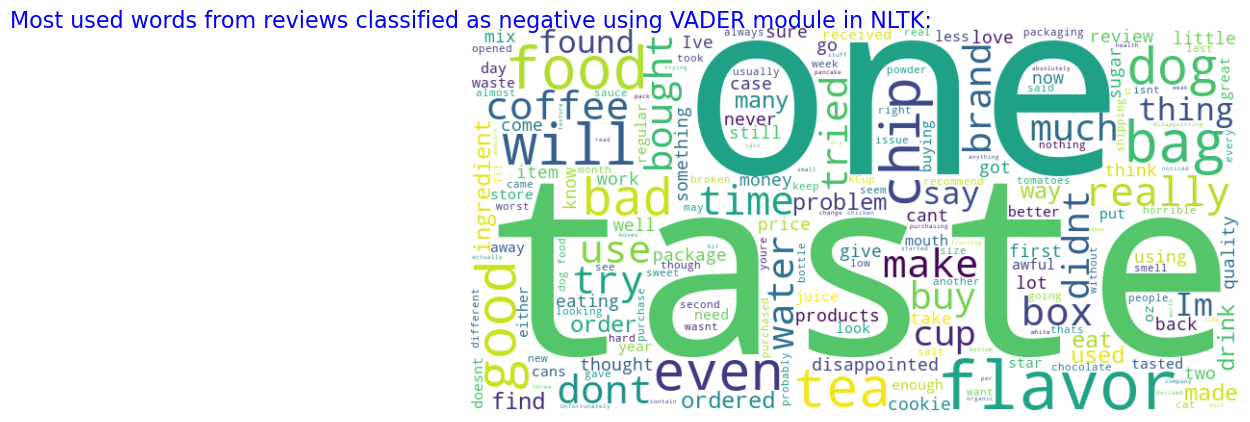

In [32]:
# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.text(0,0,'Most used words from reviews classified as negative using VADER module in NLTK:',horizontalalignment='center',fontsize=16, color='blue')
plt.show()